## Import All Libraries

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from ydata_profiling import ProfileReport

from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

import pickle

import warnings
warnings.filterwarnings('ignore')

In [7]:
data=pd.read_csv("players_20.csv")
data

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


# Basic checks

In [4]:
data.head(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [5]:
data.tail(5)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2
18277,233449,https://sofifa.com/player/233449/ximing-pan/20...,Pan Ximing,潘喜明,26,1993-01-11,182,78,China PR,Hebei China Fortune FC,...,48+2,49+2,49+2,49+2,48+2,48+2,50+2,50+2,50+2,48+2


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


## EDA

In [3]:
!pip install ydata-profiling

In [4]:
profile = ProfileReport(data, explorative=True)
profile.to_file("data_profile_report.html")
print("\nData profiling report saved as 'data_profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]


Data profiling report saved as 'data_profile_report.html


In [8]:
data.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


## Check the null values

In [9]:
data.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

In [9]:
data.shape

(18278, 104)

## Check the Outliers

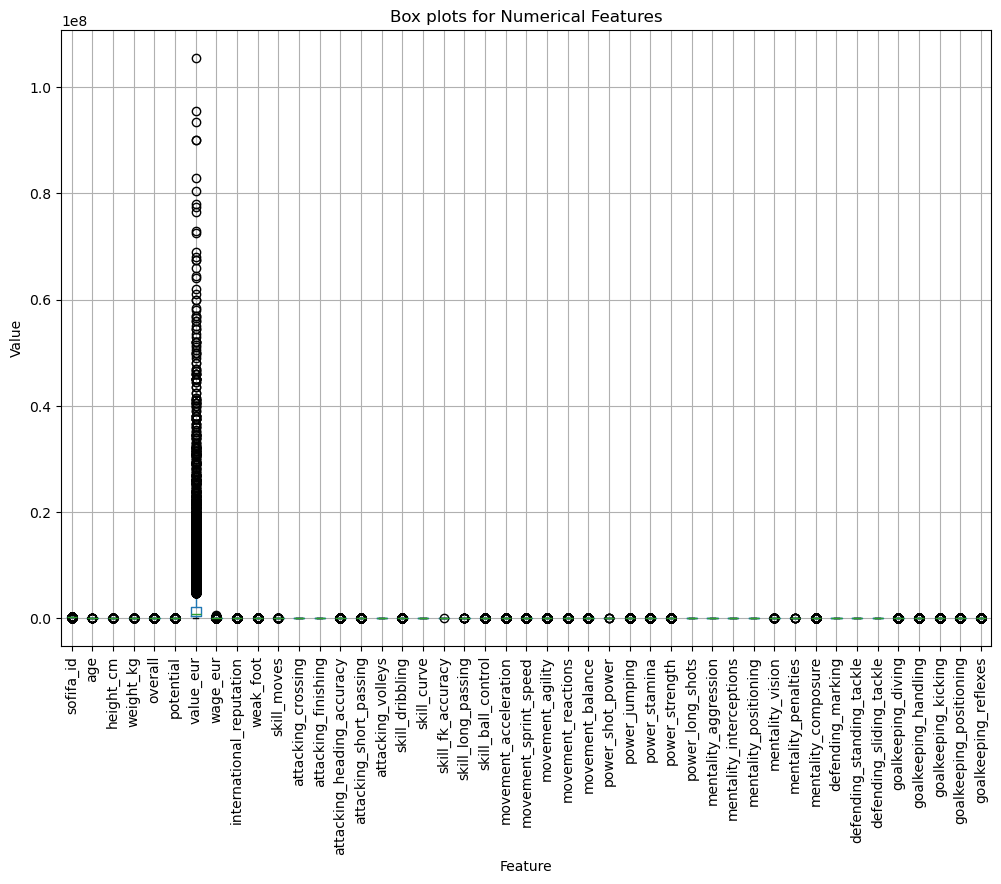

In [10]:
# Select numerical columns
numerical_cols = data.select_dtypes(include=['int']).columns

# Create box plots for all numerical features
plt.figure(figsize=(12, 8))
data[numerical_cols].boxplot()
plt.xticks(rotation=90)
plt.title('Box plots for Numerical Features')
plt.ylabel('Value')
plt.xlabel('Feature')
plt.show()


## Check the Correlation

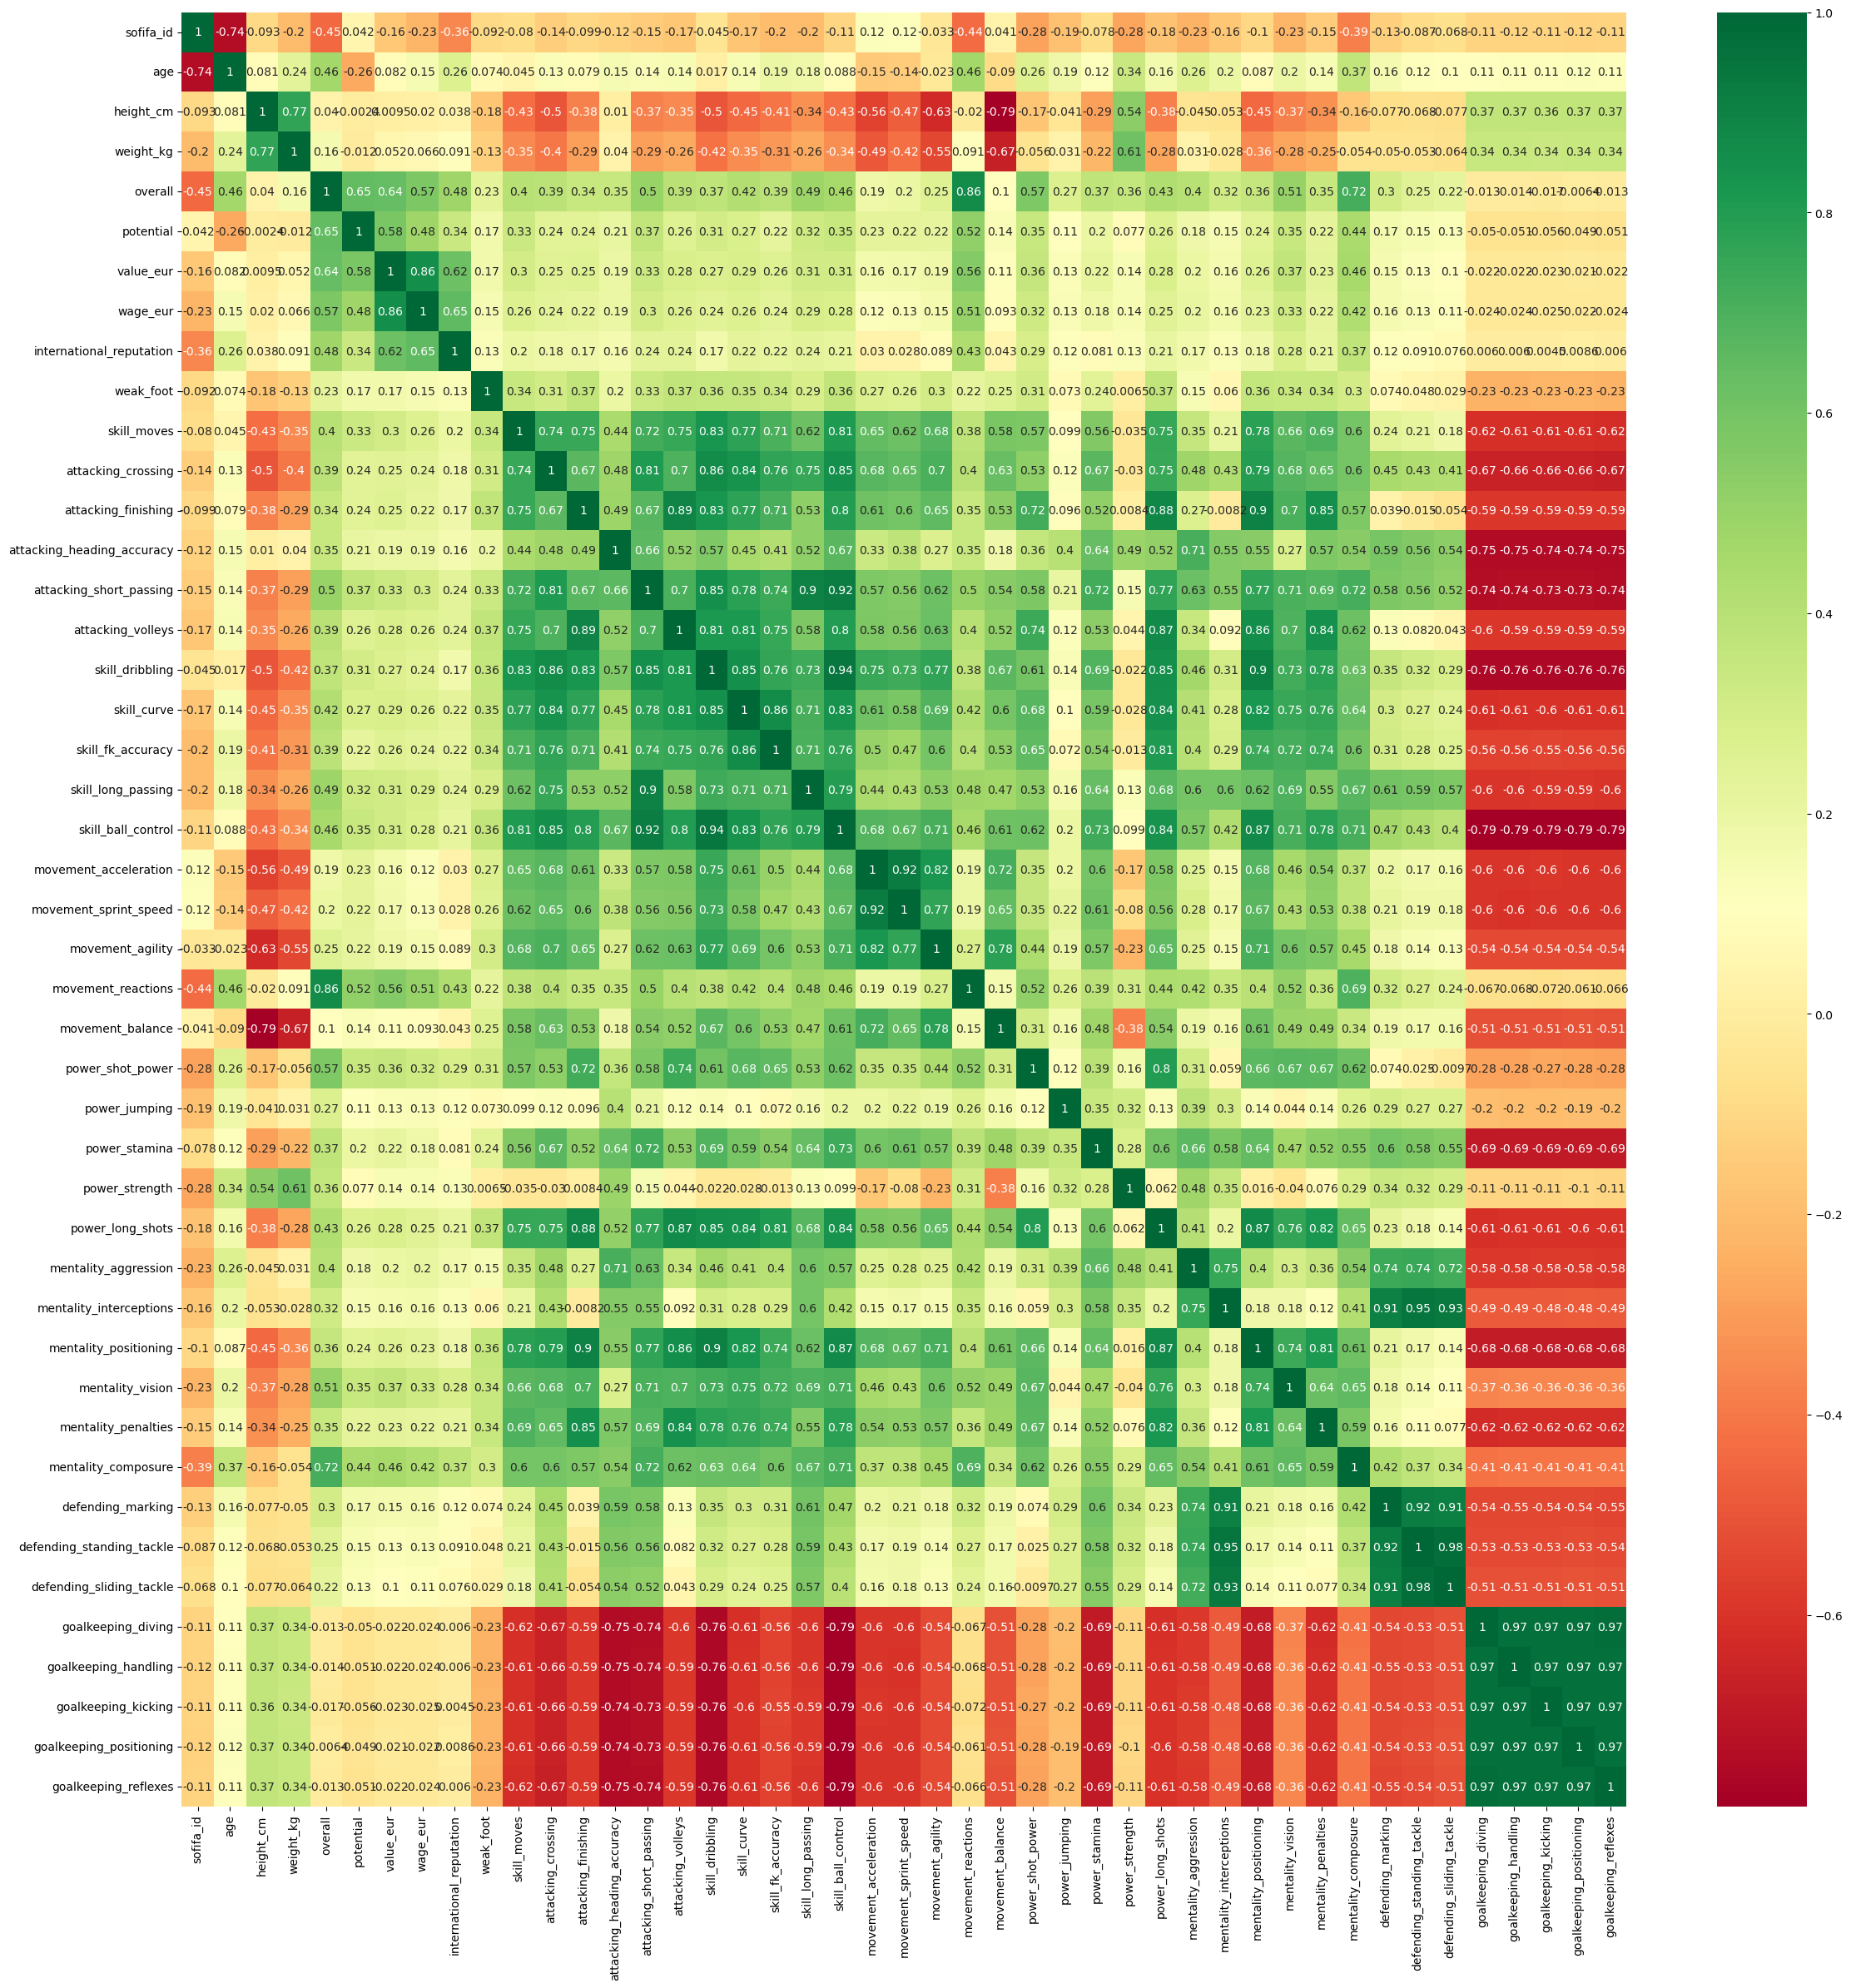

In [11]:
plt.figure(figsize=(28,28))#increase plot size
sns.heatmap(data.select_dtypes(include=['int']).corr(),cmap="RdYlGn",annot=True)
plt.show()

In [12]:
data.select_dtypes(include=['int64','float64']).corr()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
sofifa_id,1.000000,-0.736680,-0.093464,-0.203620,-0.445061,0.042015,-0.159848,-0.228084,-0.360765,-0.092250,...,-0.147125,-0.385061,-0.131479,-0.087414,-0.068464,-0.113073,-0.116270,-0.114658,-0.123064,-0.113487
age,-0.736680,1.000000,0.081391,0.237169,0.464305,-0.262872,0.081513,0.151031,0.259582,0.073988,...,0.141375,0.370149,0.157007,0.116857,0.101534,0.110313,0.112929,0.112615,0.121381,0.111811
height_cm,-0.093464,0.081391,1.000000,0.768816,0.039945,-0.002432,0.009527,0.019547,0.037935,-0.175200,...,-0.335786,-0.159296,-0.077038,-0.068334,-0.076953,0.367433,0.367163,0.364992,0.367097,0.367375
weight_kg,-0.203620,0.237169,0.768816,1.000000,0.156522,-0.011738,0.051782,0.065946,0.090854,-0.128568,...,-0.246309,-0.054167,-0.049683,-0.052770,-0.064492,0.342329,0.343211,0.339805,0.344397,0.343126
overall,-0.445061,0.464305,0.039945,0.156522,1.000000,0.646650,0.638230,0.573578,0.475557,0.230276,...,0.347950,0.719992,0.303075,0.249891,0.219560,-0.013239,-0.013716,-0.017393,-0.006408,-0.012775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
goalkeeping_diving,-0.113073,0.110313,0.367433,0.342329,-0.013239,-0.049662,-0.022094,-0.023629,0.006039,-0.232714,...,-0.624495,-0.414361,-0.544390,-0.533440,-0.512461,1.000000,0.971330,0.967057,0.971218,0.973922
goalkeeping_handling,-0.116270,0.112929,0.367163,0.343211,-0.013716,-0.050859,-0.022119,-0.023590,0.005962,-0.232357,...,-0.623164,-0.413082,-0.545373,-0.534141,-0.513340,0.971330,1.000000,0.966508,0.970517,0.971244
goalkeeping_kicking,-0.114658,0.112615,0.364992,0.339805,-0.017393,-0.056216,-0.023048,-0.024679,0.004454,-0.228380,...,-0.619899,-0.411327,-0.542991,-0.533623,-0.512314,0.967057,0.966508,1.000000,0.966061,0.967866
goalkeeping_positioning,-0.123064,0.121381,0.367097,0.344397,-0.006408,-0.049007,-0.020554,-0.022428,0.008561,-0.230529,...,-0.621893,-0.406664,-0.540967,-0.530873,-0.509761,0.971218,0.970517,0.966061,1.000000,0.971060


# Preprocessing

In [13]:
data.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name', 'age', 'dob',
       'height_cm', 'weight_kg', 'nationality', 'club',
       ...
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object', length=104)

## Impute the null values

In [14]:
data = data.fillna(value=0)  # Replace NaN with 0
data

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,0,0,0,0,0,0,0,0,0,0
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,https://sofifa.com/player/245006/shuai-shao/20...,Shao Shuai,邵帅,22,1997-03-10,186,79,China PR,Beijing Renhe FC,...,43+2,42+2,42+2,42+2,43+2,45+2,46+2,46+2,46+2,45+2
18274,250995,https://sofifa.com/player/250995/mingjie-xiao/...,Xiao Mingjie,Mingjie Xiao,22,1997-01-01,177,66,China PR,Shanghai SIPG FC,...,44+2,43+2,43+2,43+2,44+2,46+2,47+2,47+2,47+2,46+2
18275,252332,https://sofifa.com/player/252332/wei-zhang/20/...,Zhang Wei,张威,19,2000-05-16,186,75,China PR,Hebei China Fortune FC,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2
18276,251110,https://sofifa.com/player/251110/haijian-wang/...,Wang Haijian,汪海健,18,2000-08-02,185,74,China PR,Shanghai Greenland Shenhua FC,...,48+2,48+2,48+2,48+2,48+2,48+2,49+2,49+2,49+2,48+2


In [15]:
data.isnull().sum()

sofifa_id     0
player_url    0
short_name    0
long_name     0
age           0
             ..
lb            0
lcb           0
cb            0
rcb           0
rb            0
Length: 104, dtype: int64

In [16]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
categorical_columns

Index(['player_url', 'short_name', 'long_name', 'dob', 'nationality', 'club',
       'player_positions', 'preferred_foot', 'work_rate', 'body_type',
       'real_face', 'player_tags', 'team_position', 'loaned_from', 'joined',
       'nation_position', 'player_traits', 'ls', 'st', 'rs', 'lw', 'lf', 'cf',
       'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb',
       'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'],
      dtype='object')

In [17]:
data = data.drop(columns=categorical_columns)
data

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,158023,32,170,72,94,94,95500000,565000,5,4,...,75,96,33,37,26,6,11,15,14,8
1,20801,34,187,83,93,93,58500000,405000,5,4,...,85,95,28,32,24,7,11,15,14,11
2,190871,27,175,68,92,92,105500000,290000,5,5,...,90,94,27,26,29,9,9,15,15,11
3,200389,26,188,87,91,93,77500000,125000,3,3,...,11,68,27,12,18,87,92,78,90,89
4,183277,28,175,74,91,91,90000000,470000,4,4,...,88,91,34,27,22,11,12,6,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,245006,22,186,79,48,56,40000,2000,1,3,...,39,41,45,50,52,5,5,13,5,14
18274,250995,22,177,66,48,56,40000,2000,1,2,...,37,35,42,53,57,13,6,14,11,9
18275,252332,19,186,75,48,56,40000,1000,1,2,...,36,39,46,52,46,7,8,10,6,14
18276,251110,18,185,74,48,54,40000,1000,1,2,...,36,40,39,44,54,14,9,13,13,13


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 61 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   sofifa_id                   18278 non-null  int64  
 1   age                         18278 non-null  int64  
 2   height_cm                   18278 non-null  int64  
 3   weight_kg                   18278 non-null  int64  
 4   overall                     18278 non-null  int64  
 5   potential                   18278 non-null  int64  
 6   value_eur                   18278 non-null  int64  
 7   wage_eur                    18278 non-null  int64  
 8   international_reputation    18278 non-null  int64  
 9   weak_foot                   18278 non-null  int64  
 10  skill_moves                 18278 non-null  int64  
 11  release_clause_eur          18278 non-null  float64
 12  team_jersey_number          18278 non-null  float64
 13  contract_valid_until        182

In [19]:
data.sofifa_id.value_counts()

sofifa_id
158023    1
247213    1
237712    1
235633    1
252324    1
         ..
202474    1
203398    1
203751    1
203875    1
233449    1
Name: count, Length: 18278, dtype: int64

In [20]:
data.age.value_counts()

age
22    1446
21    1375
23    1358
27    1324
25    1319
24    1296
26    1270
20    1247
28    1086
19    1011
29     999
30     883
31     807
18     640
32     597
33     475
35     310
34     301
17     229
36     131
37      81
38      42
39      20
40      13
16      12
41       4
42       2
Name: count, dtype: int64

## Apply Encoding Techniques

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Fit and transform the 'matchType' column to obtain label-encoded values
data['age'] = encoder.fit_transform(data['age'])

# Display the result
print(data[['age']])

       age
0       16
1       18
2       11
3       10
4       12
...    ...
18273    6
18274    6
18275    3
18276    2
18277   10

[18278 rows x 1 columns]


In [22]:
OHE_columns = ['nationality', 'club']
standard_scaler = ['age', 'height_cm', 'weight_kg', 'potential', 'value_eur']
label_encoder = []  # Example placeholder if label encoding is needed
passthrough = []  # Example placeholder for passthrough columns

# Preprocessing

In [23]:
class ModifiedLabelEncoder(LabelEncoder):
    def fit_transform(self, y, *args, **kwargs):
        return super().fit_transform(y).reshape(-1, 1)

    def transform(self, y, *args, **kwargs):
        return super().transform(y).reshape(-1, 1)

In [24]:
def same(x):
    return x

In [25]:
no_trans=FunctionTransformer(same)

In [26]:
preprocessor = ColumnTransformer([
    ("OHE columns", OneHotEncoder(), OHE_columns),
    ("Label_encoder", ModifiedLabelEncoder(), label_encoder),
    ("Standard_scaler", StandardScaler(), standard_scaler),
    ('Pass_through',no_trans,passthrough)])

In [27]:
preprocessor

ColumnTransformer(transformers=[('OHE columns', OneHotEncoder(),
                                 ['nationality', 'club']),
                                ('Label_encoder', ModifiedLabelEncoder(), []),
                                ('Standard_scaler', StandardScaler(),
                                 ['age', 'height_cm', 'weight_kg', 'potential',
                                  'value_eur']),
                                ('Pass_through',
                                 FunctionTransformer(func=<function same at 0x0000021BD695FF60>),
                                 [])])

In [28]:
with open("preprocessingofplayer.pkl","wb") as f:
    pickle.dump(preprocessor,f)

# Now I will do the implementation

In [29]:
with open("tree.pkl","wb") as f:
    pickle.dump(preprocessor,f)

In [30]:
data.isnull().sum()

sofifa_id                  0
age                        0
height_cm                  0
weight_kg                  0
overall                    0
                          ..
goalkeeping_diving         0
goalkeeping_handling       0
goalkeeping_kicking        0
goalkeeping_positioning    0
goalkeeping_reflexes       0
Length: 61, dtype: int64

## Split the data into training and testing

In [31]:
x=data.drop(['overall'],axis=1)
y=data['overall']

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [33]:
x_train 

,sofifa_id,age,height_cm,weight_kg,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
4127,225530,7,196,96,78,3400000,10000,1,3,3,...,68,67,28,21,20,9,6,8,9,14
8585,209017,12,185,83,67,800000,5000,1,3,3,...,64,71,45,22,22,14,13,7,7,16
9317,220593,9,186,84,69,600000,2000,1,2,1,...,21,33,11,19,16,68,64,60,62,70
17431,247464,1,175,75,69,130000,1000,1,3,2,...,43,38,37,38,41,11,12,6,6,6
6486,209371,17,179,73,69,500000,5000,1,3,2,...,72,70,67,69,67,12,15,8,13,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,229756,7,188,78,73,625000,1000,1,3,2,...,40,47,65,68,66,10,10,8,6,14
11964,192643,16,173,72,64,350000,2000,1,5,3,...,55,66,50,62,63,10,8,13,6,13
5390,189920,15,193,89,70,1100000,6000,1,3,1,...,23,54,11,20,18,74,62,57,74,75
860,220131,11,191,86,79,12000000,69000,1,4,3,...,72,74,30,25,29,7,10,10,10,8


In [34]:
y_train

4127     71
8585     67
9317     66
17431    54
6486     69
         ..
11284    64
11964    64
5390     70
860      78
15795    59
Name: overall, Length: 13708, dtype: int64

In [35]:
x_test

,sofifa_id,age,height_cm,weight_kg,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
11854,165502,16,183,79,64,270000,1000,1,2,1,...,14,60,18,17,17,66,63,62,57,66
2647,245850,14,186,80,74,5000000,1000,1,3,3,...,61,76,67,72,68,8,11,13,10,14
5945,229692,9,185,80,74,1000000,8000,1,4,1,...,24,41,22,14,11,70,65,74,66,72
6798,241025,6,185,79,76,1300000,5000,1,4,3,...,56,57,32,31,30,11,8,13,8,8
12985,202295,14,191,83,63,350000,2000,1,5,2,...,62,62,21,23,22,14,7,13,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16558,245747,3,184,80,67,150000,1000,1,3,2,...,35,38,53,57,51,7,7,6,9,6
2357,203741,11,180,70,75,5500000,16000,1,5,3,...,45,64,67,68,69,15,11,14,10,10
5514,206317,11,194,84,70,1600000,24000,1,3,3,...,46,75,67,72,69,14,10,8,11,6
5665,234111,3,185,75,84,2200000,2000,1,4,3,...,74,71,52,54,54,5,8,10,15,5


In [36]:
y_test

11854    64
2647     74
5945     69
6798     68
12985    63
         ..
16558    57
2357     74
5514     70
5665     69
14522    61
Name: overall, Length: 4570, dtype: int64

## Model Building

In [37]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

## Check the Accuracy Score

In [38]:
from sklearn.metrics import accuracy_score,f1_score,classification_report
y_predict = clf.predict(x_test)    # predicting the model
acc = accuracy_score(y_test,y_predict)
acc


0.77527352297593

In [39]:
print(classification_report(y_test,y_predict)) 

              precision    recall  f1-score   support

          48       0.29      0.57      0.38         7
          49       0.40      0.38      0.39        16
          50       0.52      0.55      0.54        20
          51       0.71      0.69      0.70        36
          52       0.76      0.65      0.70        43
          53       0.61      0.51      0.56        53
          54       0.42      0.44      0.43        57
          55       0.31      0.34      0.33        58
          56       0.47      0.48      0.48        89
          57       0.53      0.56      0.55        85
          58       0.71      0.70      0.70       109
          59       0.83      0.77      0.80       130
          60       0.79      0.81      0.80       195
          61       0.67      0.72      0.70       153
          62       0.74      0.75      0.74       206
          63       0.80      0.77      0.79       269
          64       0.85      0.81      0.83       299
          65       0.82    

## Hyperparamter tunnings

In [40]:
from sklearn.model_selection import  GridSearchCV
#creating dictionary--> key value pair of hyperparameters having key as parameter and values as its values
params = {
    "criterion":("gini", "entropy"), #quality of split
    "splitter":("best", "random"), # searches the features for a split
    "max_depth":(list(range(1, 10))), #depth of tree range from 1 to 19
    "min_samples_split":[2, 3, 4,5,6,7],    #the minimum number of samples required to split internal node
    "min_samples_leaf":list(range(1, 10)),#minimum number of samples required to be at a leaf node,we are passing list which is range from 1 to 19
}


tree_clf = DecisionTreeClassifier()                # object creation for decision tree with random state 3
tree_cv = GridSearchCV(tree_clf, params, scoring="f1", n_jobs=-1, verbose=2, cv=5)
#passing model to gridsearchCV ,
#tree_clf-->model
#params---->hyperparametes(dictionary we created)
#scoring--->performance matrix to check performance
#n_jobs---->Number of jobs to run in parallel,-1 means using all processors.
#verbose=Controls the verbosity: the higher, the more messages.
#>1 : the computation time for each fold and parameter candidate is displayed;
#>2 : the score is also displayed;
#>3 : the fold and candidate parameter indexes are also displayed together with the starting time of the computation.
#cv------> number of flods




tree_cv.fit(x_train,y_train)    # training data on gridsearch cv
best_params = tree_cv.best_params_    # it will give you best parameters
print(f"Best paramters: {best_params})") 

Fitting 5 folds for each of 1944 candidates, totalling 9720 fits
Best paramters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})


In [41]:
tree_cv.best_params_

{'criterion': 'gini',
 'max_depth': 1,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [42]:
tree_cv.best_score_

nan

In [43]:
dt1=DecisionTreeClassifier(criterion='gini',max_depth=6,min_samples_leaf= 6,min_samples_split=3,splitter='best')

In [44]:
dt1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=3)

In [45]:
y_hat1=dt1.predict(x_test)

In [46]:
accuracy_score(y_test,y_hat1)  

0.4667396061269147

In [47]:
print(classification_report(y_test,y_hat1)) #

              precision    recall  f1-score   support

          48       0.00      0.00      0.00         7
          49       0.00      0.00      0.00        16
          50       0.00      0.00      0.00        20
          51       0.36      0.97      0.53        36
          52       0.00      0.00      0.00        43
          53       0.00      0.00      0.00        53
          54       0.00      0.00      0.00        57
          55       0.19      0.67      0.30        58
          56       0.34      0.26      0.29        89
          57       0.00      0.00      0.00        85
          58       0.18      0.69      0.29       109
          59       0.91      0.23      0.37       130
          60       0.46      0.54      0.50       195
          61       0.38      0.27      0.32       153
          62       0.30      0.57      0.39       206
          63       0.48      0.24      0.32       269
          64       0.66      0.48      0.56       299
          65       0.45    

### In RFC wil do only decision tree

In [48]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [49]:
y_predict = rf_clf.predict(x_test) 

In [50]:
accuracy_score(y_test,y_predict) 

0.6560175054704596

In [51]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

          48       0.33      0.14      0.20         7
          49       0.44      0.25      0.32        16
          50       0.40      0.85      0.54        20
          51       0.81      0.61      0.70        36
          52       0.57      0.49      0.53        43
          53       0.46      0.34      0.39        53
          54       0.57      0.58      0.57        57
          55       0.38      0.29      0.33        58
          56       0.45      0.51      0.47        89
          57       0.45      0.44      0.44        85
          58       0.57      0.66      0.61       109
          59       0.65      0.65      0.65       130
          60       0.75      0.78      0.77       195
          61       0.69      0.53      0.60       153
          62       0.62      0.73      0.67       206
          63       0.75      0.62      0.68       269
          64       0.69      0.68      0.68       299
          65       0.60    

### if in case accuracy score will be low that time we will use RandomizedSearchCV and GridSearchCV to imrpove the accuracy score

In [52]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [ ]:
rf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200, 500],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Perform Randomized Search CV
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
random_search.fit(x_train, y_train)

# Print best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Evaluate the best model on test data
best_rf = random_search.best_estimator_
y_pred = best_rf.predict(x_test)

print("Accuracy on test set:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [76]:
rf_best_params = random_search.best_params_       # it will give you best parameters
print(f"Best paramters: {rf_best_params})")


Best paramters: {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False})


In [70]:
rf_clf2 = RandomForestClassifier(n_estimators=1800,min_samples_leaf=1,min_samples_split=5,max_features="sqrt",max_depth=20,bootstrap = False)
rf_clf2.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=20, min_samples_split=5,
                       n_estimators=1800)

In [ ]:
y_predict=rf_clf2.predict(x_test)    # testing
accur=accuracy_score(y_test,y_predict)   # checking performance
accur

In [67]:
print(classification_report(y_test,y_predict)) 

              precision    recall  f1-score   support

          48       0.33      0.14      0.20         7
          49       0.64      0.44      0.52        16
          50       0.41      0.85      0.56        20
          51       0.78      0.58      0.67        36
          52       0.56      0.51      0.54        43
          53       0.45      0.36      0.40        53
          54       0.51      0.46      0.48        57
          55       0.48      0.34      0.40        58
          56       0.45      0.56      0.50        89
          57       0.38      0.35      0.37        85
          58       0.53      0.64      0.58       109
          59       0.67      0.64      0.66       130
          60       0.75      0.78      0.76       195
          61       0.63      0.48      0.54       153
          62       0.58      0.66      0.62       206
          63       0.71      0.61      0.66       269
          64       0.71      0.68      0.70       299
          65       0.59    